## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [15]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [16]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [17]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [18]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [19]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [20]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [21]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [22]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [23]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [24]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [26]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [27]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-27-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 36s 19s/step - loss: 3.5631 - accuracy: 0.3906 - val_loss: 9.7140 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 20s 14s/step - loss: 13.3121 - accuracy: 0.3125 - val_loss: 6.1526 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 18s 13s/step - loss: 7.5165 - accuracy: 0.3906 - val_loss: 3.3362 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 19s 14s/step - loss: 5.1014 - accuracy: 0.2656 - val_loss: 10.8263 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 21s 15s/step - loss: 7.4351 - accuracy: 0.3438 - val_loss: 3.6713 - val_accuracy: 0.4483
Epoch 6/50
2/2 [==============================] - 21s 15s/step - loss: 3.6710 - accuracy: 0.5000 - val_loss: 3.7087 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 21s 15s/step - loss: 3.4783 - accuracy: 0.4531 - val_loss: 4.2155 - val_accuracy: 0.3276
Epoch 8/50
2/2 [=========

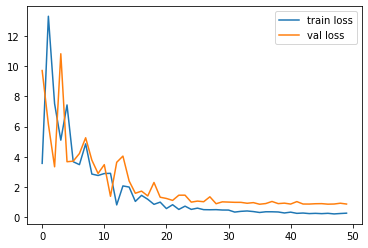

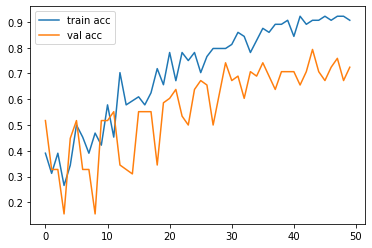

<Figure size 432x288 with 0 Axes>

In [28]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [30]:

y_pred = model.predict(test_set)


In [31]:
y_pred

array([[4.73037921e-02, 3.30250233e-01, 6.22446001e-01],
       [1.11568449e-02, 9.66223419e-01, 2.26196591e-02],
       [3.43798622e-02, 3.27195856e-03, 9.62348163e-01],
       [2.77296044e-02, 8.35912287e-01, 1.36358112e-01],
       [7.92277098e-01, 2.02995434e-01, 4.72746603e-03],
       [1.85743034e-01, 2.20915377e-02, 7.92165399e-01],
       [3.32328817e-03, 9.19423163e-01, 7.72535875e-02],
       [4.82846722e-02, 4.11221670e-04, 9.51304078e-01],
       [1.48358213e-05, 3.65141168e-04, 9.99619961e-01],
       [3.82564366e-01, 3.75480235e-01, 2.41955474e-01],
       [1.21552525e-02, 9.43278015e-01, 4.45667952e-02],
       [6.20364211e-02, 3.86567593e-01, 5.51395953e-01],
       [8.70633870e-04, 8.66706789e-01, 1.32422507e-01],
       [1.00898836e-02, 7.76041210e-01, 2.13868946e-01],
       [8.63801837e-02, 5.51198516e-03, 9.08107817e-01],
       [7.00246021e-02, 6.80659592e-01, 2.49315768e-01],
       [7.59158969e-01, 1.52140230e-01, 8.87007341e-02],
       [4.60847877e-02, 9.11635

In [32]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [33]:
y_pred

array([2, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2,
       2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1], dtype=int64)

In [34]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [37]:
model=load_model('model_resnet50.h5')

In [38]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [39]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [40]:
x.shape

(224, 224, 3)

In [41]:
x=x/255

In [42]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [43]:
model.predict(img_data)

array([[7.5075455e-04, 2.5768627e-03, 9.9667239e-01]], dtype=float32)

In [44]:
a=np.argmax(model.predict(img_data), axis=1)

In [45]:
a==1

array([False])